In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
hsd = pd.read_csv("happiness_score_dataset.csv")
hsd.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [ ]:
hsd.shape

In [ ]:
hsd.isnull().sum()

In [ ]:
hsd.dtypes

In [ ]:
hsd.describe()

In [ ]:
sns.boxplot(hsd['Economy (GDP per Capita)'], orient='v')

In [ ]:
sns.boxplot(hsd['Family'], orient='v')

In [ ]:
sns.boxplot(hsd['Health (Life Expectancy)'], orient='v')

In [ ]:
sns.boxplot(hsd['Freedom'], orient='v')

In [ ]:
sns.boxplot(hsd['Trust (Government Corruption)'], orient='v')

In [ ]:
sns.boxplot(hsd['Generosity'], orient='v')

In [ ]:
sns.lmplot(x="Happiness Score", y="Trust (Government Corruption)", data=hsd)

In [ ]:
cols=['Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom','Trust (Government Corruption)','Generosity']
sns.lmplot(x=cols[0], y='Happiness Score', data=hsd)
sns.lmplot(x=cols[1], y='Happiness Score', data=hsd)
sns.lmplot(x=cols[2], y='Happiness Score', data=hsd)
sns.lmplot(x=cols[3], y='Happiness Score', data=hsd)
sns.lmplot(x=cols[4], y='Happiness Score', data=hsd)
sns.lmplot(x=cols[5], y='Happiness Score', data=hsd)

In [27]:
hsd.drop(['Country', 'Region', 'Happiness Rank', 'Standard Error', 'Dystopia Residual'],1, inplace=True)
hsd.head()

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


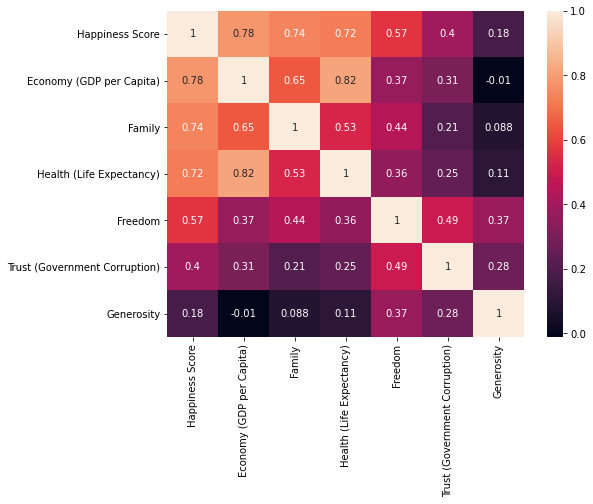

In [30]:
plt.figure(figsize=(8,6))
sns.heatmap(hsd.corr(), annot=True)

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score

In [59]:
x = hsd.drop(["Happiness Score"],1)
y = hsd["Happiness Score"]
print(x.head())
print(y.head())

   Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
0                   1.39651  1.34951                   0.94143  0.66557   
1                   1.30232  1.40223                   0.94784  0.62877   
2                   1.32548  1.36058                   0.87464  0.64938   
3                   1.45900  1.33095                   0.88521  0.66973   
4                   1.32629  1.32261                   0.90563  0.63297   

   Trust (Government Corruption)  Generosity  
0                        0.41978     0.29678  
1                        0.14145     0.43630  
2                        0.48357     0.34139  
3                        0.36503     0.34699  
4                        0.32957     0.45811  
0    7.587
1    7.561
2    7.527
3    7.522
4    7.427
Name: Happiness Score, dtype: float64


In [60]:
lm = LinearRegression()
def rstate():
    rscore = []
    for i in range(1,201):
        x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.3, random_state=i)
        lm.fit(x_train, y_train)
        pred = lm.predict(x_test)
        #print(mean_squared_error(y_test, pred))
        #print(np.sqrt(mean_squared_error(y_test, pred)))
        #print(mean_absolute_error(y_test, pred))
        #print(r2_score(y_test, pred))
        rscore.append(r2_score(y_test, pred))
    return rscore.index(max(rscore))+1

In [61]:
print("Best randomstate is:",rstate())

Best randomstate is: 61


In [62]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.3, random_state=rstate())

In [66]:
lm.fit(x_train, y_train)
pred = lm.predict(x_test)
print(mean_squared_error(y_test, pred))
print(np.sqrt(mean_squared_error(y_test, pred)))
print(mean_absolute_error(y_test, pred))
print(r2_score(y_test, pred))

0.21965467965594535
0.46867331869431755
0.3547808169110436
0.8455253648079549
